# Problem Statement – Neural Network Architecture Visualization

Write a **Python program** to draw (visualize) the **architecture of a Neural Network** used to classify **fraudulent and non-fraudulent credit card transactions**.

---

## Fraud Detection Dataset – Input Features

The fraud detection dataset contains the following features:

- **TransactionAmount**  
- **TransactionTime**  
- **MerchantCategory**  
- **CustomerAge**  
- **AccountBalance**  
- **NumberOfTransactionsToday**  

---

## Target Variable

- **Fraud**
  - `0` → Genuine Transaction  
  - `1` → Fraudulent Transaction  

---

## Objective

- Design a neural network architecture that takes the above input features
- Include one or more hidden layers
- Output a binary classification indicating whether a transaction is **fraudulent or genuine**


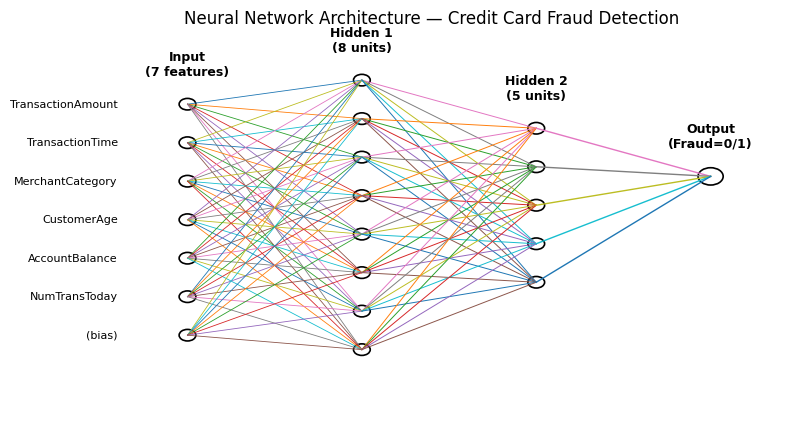

In [1]:
# Draw NN architecture for fraud detection
import matplotlib.pyplot as plt

def draw_layer(ax, x, y_start, n_nodes, node_radius=0.12, label=None):
    ys = []
    for i in range(n_nodes):
        y = y_start - i*0.8
        circle = plt.Circle((x,y), node_radius, fill=False, linewidth=1.2)
        ax.add_artist(circle)
        ys.append(y)
    if label:
        ax.text(x, y_start + 0.6, label, ha='center', fontsize=9, weight='bold')
    return ys

def draw_nn_fraud():
    fig, ax = plt.subplots(figsize=(9,5))
    ax.set_xlim(0, 10)
    ax.set_ylim(-6.5, 1.5)
    ax.axis('off')

    # Layers: input (7), hidden1 (8), hidden2 (5), output (1)
    x_input, x_h1, x_h2, x_out = 1.5, 4, 6.5, 9
    y0 = 0.5
    input_nodes = draw_layer(ax, x_input, y0-0.5, 7, label='Input\n(7 features)')
    h1_nodes = draw_layer(ax, x_h1, y0, 8, label='Hidden 1\n(8 units)')
    h2_nodes = draw_layer(ax, x_h2, y0-1, 5, label='Hidden 2\n(5 units)')
    out_nodes = draw_layer(ax, x_out, y0-2, 1, node_radius=0.18, label='Output\n(Fraud=0/1)')

    # connections
    for a in input_nodes:
        for b in h1_nodes:
            ax.plot([x_input, x_h1], [a, b], linewidth=0.6)
    for a in h1_nodes:
        for b in h2_nodes:
            ax.plot([x_h1, x_h2], [a, b], linewidth=0.7)
    for a in h2_nodes:
        for b in out_nodes:
            ax.plot([x_h2, x_out], [a, b], linewidth=1.0)

    # Input labels
    input_labels = ['TransactionAmount','TransactionTime','MerchantCategory',
                    'CustomerAge','AccountBalance','NumTransToday','(bias)']
    for i, txt in enumerate(input_labels):
        ax.text(x_input-1.0, input_nodes[i], txt, ha='right', va='center', fontsize=8)

    plt.title('Neural Network Architecture — Credit Card Fraud Detection', fontsize=12)
    plt.show()

# call function to show diagram
draw_nn_fraud()
